# XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# X_train = pd.read_csv("X_train_c.csv")
# X_test = pd.read_csv("X_test_c.csv")
# y_train = pd.read_csv("y_train_c.csv")
# y_test = pd.read_csv("y_test_c.csv")

In [2]:
# grid search
# n estimator =  tree

# from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# xgb_clf = xgb.XGBClassifier(n_jobs = -1)

# param_grid = [
#     # {'n_estimators':[500, 700, 800, 1000], 'max_depth':[10,12,14,16,18]}
#     {'n_estimators':[800], 'max_depth':[12], "learning_rate":[0.7]}# 0.1, 0.4, 0.6, 1 0.7
# ]

# grid_search = GridSearchCV(xgb_clf, param_grid, cv = 5, scoring = "f1_macro")

# grid_search.fit(X_train, y_train)

In [3]:
# grid_search.best_params_

In [4]:
# grid_search.cv_results_["mean_test_score"].max()

## 2. Training dengan parameter grid search

In [5]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

xgb_clf = xgb.XGBClassifier(n_jobs = -1,
                            n_estimators = 300,
                            max_depth = 26,
                            learning_rate = 0.7
)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_val)

precision_metric = precision_score(y_val, y_train_pred, average = "macro")
recall_metric = recall_score(y_val, y_train_pred, average = "macro")
f1_metric = f1_score(y_val, y_train_pred, average = "macro")
accuracy_metric = accuracy_score(y_val, y_train_pred)

print("Precision ",precision_metric)
print("Recall ", recall_metric)
print("F1 ", f1_metric)
print("Accuracy ",accuracy_metric)

[15:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision  0.6923204373681262
Recall  0.7014488779194661
F1  0.6961409641797248
Accuracy  0.701530612244898


In [6]:
y_pred = xgb_clf.predict(X_test)

precision_metric = precision_score(y_test, y_pred, average = "macro")
recall_metric = recall_score(y_test, y_pred, average = "macro")
f1_metric = f1_score(y_test, y_pred, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred)

print("Precision ",precision_metric)
print("Recall ", recall_metric)
print("F1 ", f1_metric)
print("Accuracy ",accuracy_metric)

Precision  0.6953865166016402
Recall  0.6880792508346478
F1  0.6913970556408359
Accuracy  0.6928571428571428


Feature Importance

In [7]:
info = zip(X_train, xgb_clf.feature_importances_)

feature = []
scoring = []

for name, score in info:
    print(name,score)
    feature.append(name)
    scoring.append(score)

fixed_acidity 0.07455831
volatile_acidity 0.1158309
citric_acid 0.0807433
residual_sugar 0.07583865
chlorides 0.08034104
free_sulfur_dioxide 0.08051639
density 0.060152113
pH 0.07725145
sulphates 0.06862105
alcohol 0.22096309
bound_sulfur_dioxide 0.06518372


In [8]:
feature

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'bound_sulfur_dioxide']

In [9]:
scoring

[0.07455831,
 0.1158309,
 0.0807433,
 0.07583865,
 0.08034104,
 0.08051639,
 0.060152113,
 0.07725145,
 0.06862105,
 0.22096309,
 0.06518372]

In [10]:
feature_table = pd.DataFrame({
    "feature":feature,
    "score":scoring
})

In [11]:
feature_table = feature_table.sort_values("score")

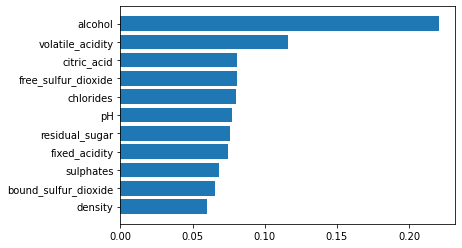

In [12]:
plt.barh(feature_table["feature"], feature_table["score"], align='center')
# ax.set_yticks(y_pos, labels=people)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
# ax.set_title('How fast do you want to go today?')

plt.show()

## Analisis Tambahan

In [13]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,bound_sulfur_dioxide
3803,7.3,0.29,0.37,8.30,0.044,45.0,0.99660,3.12,0.47,9.0,182.0
3519,5.7,0.16,0.32,1.20,0.036,7.0,0.99111,3.26,0.48,11.0,82.0
431,6.4,0.23,0.27,2.10,0.042,35.0,0.99094,3.03,0.63,10.9,65.0
1969,6.6,0.21,0.29,5.35,0.029,43.0,0.99112,2.93,0.43,11.5,63.0
2851,6.6,0.22,0.28,12.05,0.058,25.0,0.99856,3.45,0.45,9.4,100.0
...,...,...,...,...,...,...,...,...,...,...,...
2181,6.3,0.31,0.34,2.20,0.045,20.0,0.99270,3.30,0.43,10.2,57.0
2409,7.4,0.30,0.49,8.20,0.055,49.0,0.99740,3.52,0.58,9.7,139.0
2033,6.5,0.32,0.30,2.30,0.051,20.0,0.98964,3.13,0.52,12.8,107.0
1364,7.0,0.35,0.30,6.50,0.028,27.0,0.99360,3.40,0.42,11.4,60.0


In [14]:
y_train

,quality_class
3803,0
3519,0
431,1
1969,2
2851,0
...,...
2181,0
2409,1
2033,1
1364,2


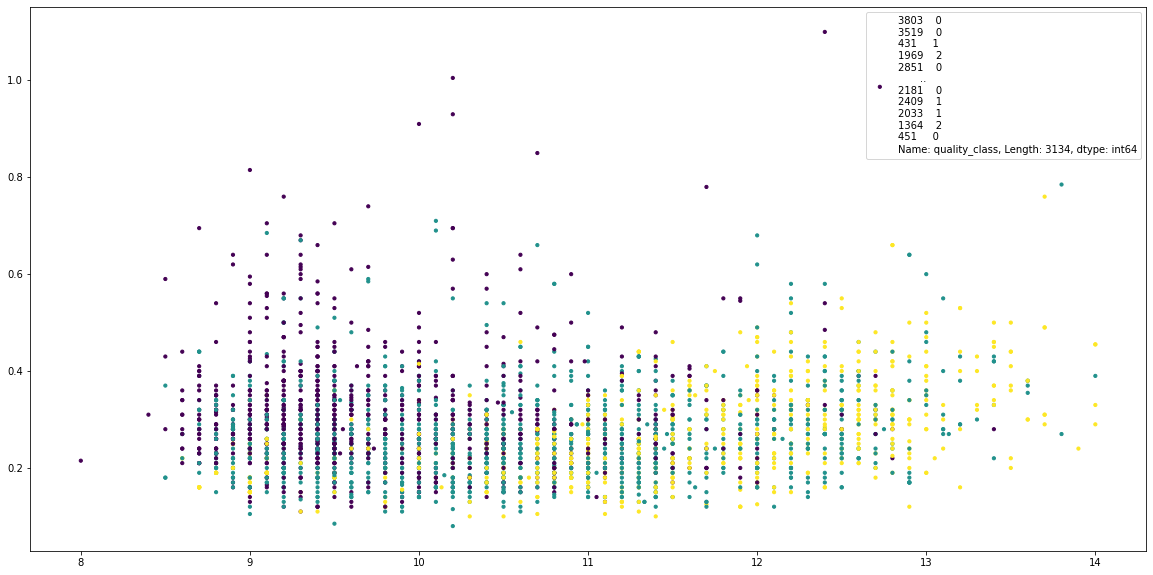

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(X_train["alcohol"], X_train["volatile_acidity"], s = 10, c=y_train["quality_class"], label = y_train["quality_class"] )
plt.legend()
plt.show()

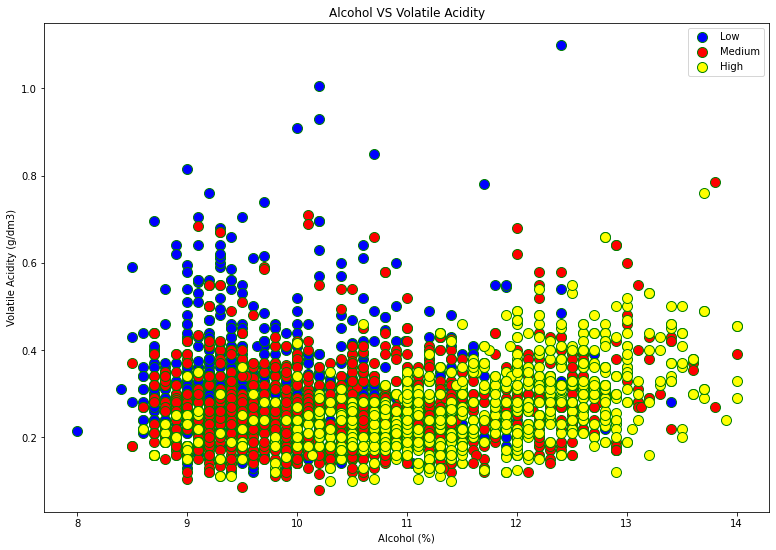

In [16]:
plt.figure(figsize=(13, 9))


plt.scatter(X_train['alcohol'][y_train.quality_class == 0], X_train['volatile_acidity'][y_train.quality_class == 0], c='blue', s=100, edgecolor='green', label = "Low")
plt.scatter(X_train['alcohol'][y_train.quality_class == 1], X_train['volatile_acidity'][y_train.quality_class == 1], c='red', s=100, edgecolor='green', label = "Medium")
plt.scatter(X_train['alcohol'][y_train.quality_class == 2], X_train['volatile_acidity'][y_train.quality_class == 2], c='yellow', s=100, edgecolor='green', label = "High")
# plt.scatter(data_analisis['Pendapatan'][data_analisis.label1_kmeans == 1], data_analisis['GDPperkapita'][data_analisis.label1_kmeans == 1], c='red', s=100, edgecolor='green')
plt.xlabel('Alcohol (%)')
plt.ylabel('Volatile Acidity (g/dm3)')
plt.legend()
plt.title('Alcohol VS Volatile Acidity')

plt.show()

In [17]:
X_train['alcohol'][y_train.quality_class == 0]

3803     9.0
3519    11.0
2851     9.4
874      9.3
1495    11.4
        ... 
3387     8.7
1929     8.9
1384     8.8
2181    10.2
451      9.5
Name: alcohol, Length: 1051, dtype: float64

In [18]:
import seaborn as sns
data0 = X_train['volatile_acidity'][y_train.quality_class == 0]
data1 = X_train['volatile_acidity'][y_train.quality_class == 1]
data2 = X_train['volatile_acidity'][y_train.quality_class == 2]
# sns.displot(data=, x='sepal length (cm)', hue='target', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

[]

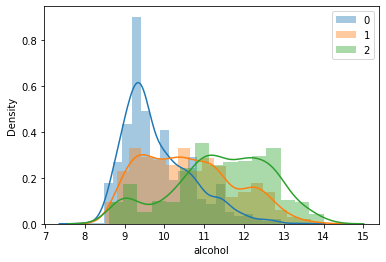

In [20]:
data0 = X_train['alcohol'][y_train.quality_class == 0]
data1 = X_train['alcohol'][y_train.quality_class == 1]
data2 = X_train['alcohol'][y_train.quality_class == 2]

sns.distplot(data0, label = 0)
sns.distplot(data1, label = 1)
sns.distplot(data2, label = 2)
plt.legend()
plt.plot()

In [ ]:
print("Quality 0 : ", data0.mean())
print("Quality 1 : ", data1.mean())
print("Quality 2 : ", data2.mean())

Quality 0 :  9.828778940691404
Quality 1 :  10.591153009427122
Quality 2 :  11.405999053030303


In [ ]:
print("Quality 0 : ", data0.median())
print("Quality 1 : ", data1.median())
print("Quality 2 : ", data2.median())

Quality 0 :  9.5
Quality 1 :  10.5
Quality 2 :  11.5


In [ ]:
print("Quality 0 : ", data0.std())
print("Quality 1 : ", data1.std())
print("Quality 2 : ", data2.std())

Quality 0 :  0.8607110630456686
Quality 1 :  1.1632352814385738
Quality 2 :  1.2455870499881576


In [21]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.7, max_delta_step=0,
              max_depth=26, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Dump the model into pickle file

In [22]:
import pickle

In [23]:
pickle.dump(xgb_clf, open('model_xgb.pkl','wb')) #write

In [24]:
model = pickle.load(open('model_xgb.pkl','rb')) #read
# print(model.predict([[2, 9, 6]]))

In [47]:
model.predict(np.array([[7.3,0.29, 0.37, 8.3, 0.044, 45, 0.9966, 3.12, 0.47, 9, 182 ]]))

array([0], dtype=int64)